# Heart Disease Risk Prediction: Logistic Regression

## Contexto del Problema

En este notebook implementamos regresión logística desde cero para predecir la presencia de enfermedad cardíaca usando el [Heart Disease Dataset de Kaggle](https://www.kaggle.com/datasets/neurocipher/heartdisease).

**Autor:** Samuel Leonardo Albarracin Vergara
**Curso:** AREP
**Fecha:** Enero 27 2026

## 1. Setup:  
carga y preparación del dataset
-  Importar librerias

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


np.random.seed(42)  
%matplotlib inline
print("Setup complete.")

Setup complete.


### Cargar el dataset

El dataset fue descargado de Kaggle y contiene registros de 303 pacientes con 14 características clínicas.

In [76]:
df = pd.read_csv('data/heart.csv')
print(f"Dimensiones del dataset: {df.shape[0]} filas × {df.shape[1]} columnas")
df.head()

Dimensiones del dataset: 270 filas × 14 columnas


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


### Exploración inicial (EDA)

Analizamos la estructura del dataset, tipos de datos, valores faltantes y distribución de las variables.

In [77]:
# Información general del dataset
print("INFORMACIÓN DEL DATASET")
df.info()

INFORMACIÓN DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes:

In [78]:
# Estadísticas descriptivas
print("\nESTADÍSTICAS DESCRIPTIVAS")
df.describe()


ESTADÍSTICAS DESCRIPTIVAS


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [79]:
# Verificar valores nulos
print("\nVALORES NULOS POR COLUMNA")
print(df.isnull().sum())
print(f"\nTotal de valores nulos: {df.isnull().sum().sum()}")


VALORES NULOS POR COLUMNA
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

Total de valores nulos: 0


In [80]:
# Distribución de la variable target
print("\nDISTRIBUCIÓN DE LA VARIABLE TARGET (Heart Disease)")
print(df['Heart Disease'].value_counts())
print(f"\nPorcentaje con enfermedad: {(df['Heart Disease'] == 'Presence').mean() * 100:.1f}%")


DISTRIBUCIÓN DE LA VARIABLE TARGET (Heart Disease)
Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

Porcentaje con enfermedad: 44.4%


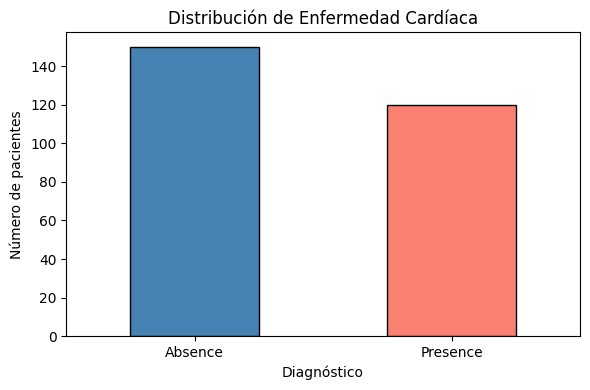

In [81]:
# Visualizar distribución del target
fig, ax = plt.subplots(figsize=(6, 4))
df['Heart Disease'].value_counts().plot(kind='bar', color=['steelblue', 'salmon'], edgecolor='black')
plt.title('Distribución de Enfermedad Cardíaca')
plt.xlabel('Diagnóstico')
plt.ylabel('Número de pacientes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Preprocesamiento

#### Binarización del target
Convertimos la variable Heart Disease de categórica (Absence, Presence) a numérica (0/1).

In [82]:
# definimos Absence = 0, Presence = 1
df['target'] = (df['Heart Disease'] == 'Presence').astype(int)

# Verificar la conversión
print("Conversión del target:")
print(df[['Heart Disease', 'target']].drop_duplicates())

Conversión del target:
  Heart Disease  target
0      Presence       1
1       Absence       0


### Selección de Features

Seleccionamos 6 características clínicas relevantes para la predicción:

| Feature | Descripción | Relevancia clínica |
|---------|-------------|-------------------|
| Age | Edad del paciente | El riesgo cardíaco aumenta con la edad |
| BP | Presión arterial en reposo (mm Hg) | Hipertensión es factor de riesgo |
| Cholesterol | Colesterol sérico (mg/dL) | Niveles altos asociados a enfermedad |
| Max HR | Frecuencia cardíaca máxima | Capacidad cardiovascular |
| ST depression | Depresión ST inducida por ejercicio | Indicador de isquemia |
| Number of vessels fluro | Vasos coloreados por fluoroscopia (0-3) | Indica obstrucción arterial |

In [83]:
# Verificar nombres exactos de las columnas
print("Columnas disponibles:")
for i, col in enumerate(df.columns):
    print(f"  {i}: '{col}'")

Columnas disponibles:
  0: 'Age'
  1: 'Sex'
  2: 'Chest pain type'
  3: 'BP'
  4: 'Cholesterol'
  5: 'FBS over 120'
  6: 'EKG results'
  7: 'Max HR'
  8: 'Exercise angina'
  9: 'ST depression'
  10: 'Slope of ST'
  11: 'Number of vessels fluro'
  12: 'Thallium'
  13: 'Heart Disease'
  14: 'target'


In [84]:
# Selección de features
feature_names = [
    'Age',
    'BP',
    'Cholesterol',
    'Max HR',
    'ST depression',
    'Number of vessels fluro'
]

# Crear matriz de features (X) y vector target (y)
X = df[feature_names].values
y = df['target'].values

print(f"Matriz de features X: {X.shape}")
print(f"Vector target y: {y.shape}")
print(f"\nFeatures seleccionadas: {feature_names}")

Matriz de features X: (270, 6)
Vector target y: (270,)

Features seleccionadas: ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']


### División Train/Test (70/30 estratificada)

Dividimos los datos manteniendo la proporción de clases en ambos conjuntos. Implementamos la función manualmente sin usar sklearn.

In [85]:
def train_test_split_stratified(X, y, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    
    # Obtener índices de cada clase
    idx_class_0 = np.where(y == 0)[0]  # Sin enfermedad
    idx_class_1 = np.where(y == 1)[0]  # Con enfermedad
    
    # Mezclar índices aleatoriamente
    np.random.shuffle(idx_class_0)
    np.random.shuffle(idx_class_1)
    
    # Calcular cantidad para test de cada clase
    n_test_0 = int(len(idx_class_0) * test_size)
    n_test_1 = int(len(idx_class_1) * test_size)
    
    # Dividir índices
    test_idx = np.concatenate([idx_class_0[:n_test_0], idx_class_1[:n_test_1]])
    train_idx = np.concatenate([idx_class_0[n_test_0:], idx_class_1[n_test_1:]])
    
    # Mezclar los conjuntos finales
    np.random.shuffle(test_idx)
    np.random.shuffle(train_idx)
    
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

# Aplicar la división
X_train, X_test, y_train, y_test = train_test_split_stratified(X, y, test_size=0.3)

print("DIVISIÓN DE DATOS")
print(f"Conjunto de entrenamiento: {len(X_train)} muestras")
print(f"Conjunto de prueba: {len(X_test)} muestras")
print(f"\nDistribución en Train:")
print(f"  - Sin enfermedad (0): {np.sum(y_train == 0)} ({np.mean(y_train == 0)*100:.1f}%)")
print(f"  - Con enfermedad (1): {np.sum(y_train == 1)} ({np.mean(y_train == 1)*100:.1f}%)")
print(f"\nDistribución en Test:")
print(f"  - Sin enfermedad (0): {np.sum(y_test == 0)} ({np.mean(y_test == 0)*100:.1f}%)")
print(f"  - Con enfermedad (1): {np.sum(y_test == 1)} ({np.mean(y_test == 1)*100:.1f}%)")

DIVISIÓN DE DATOS
Conjunto de entrenamiento: 189 muestras
Conjunto de prueba: 81 muestras

Distribución en Train:
  - Sin enfermedad (0): 105 (55.6%)
  - Con enfermedad (1): 84 (44.4%)

Distribución en Test:
  - Sin enfermedad (0): 45 (55.6%)
  - Con enfermedad (1): 36 (44.4%)


### Normalización de Features

Aplicamos normalización Z-score para que todas las features tengan media 0 y desviación estándar 1. Esto es **crítico** para que gradient descent converja correctamente.

$$X_{norm} = \frac{X - \mu}{\sigma}$$

**Importante:** Usamos las estadísticas (media y std) del conjunto de **entrenamiento** para normalizar ambos conjuntos. Esto evita data leakage.

In [86]:
def normalize_features(X_train, X_test):
    # Calcular estadísticas SOLO del train set
    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    
    # Normalizar ambos conjuntos con las mismas estadísticas
    X_train_norm = (X_train - mean) / std
    X_test_norm = (X_test - mean) / std
    
    return X_train_norm, X_test_norm, mean, std

# Aplicar normalización
X_train_norm, X_test_norm, feat_mean, feat_std = normalize_features(X_train, X_test)

# Verificar la normalización
print("VERIFICACIÓN DE NORMALIZACIÓN (Train set)")
print(f"{'Feature':<25} {'Media':<12} {'Std':<12}")
for i, name in enumerate(feature_names):
    print(f"{name:<25} {X_train_norm[:, i].mean():<12.6f} {X_train_norm[:, i].std():<12.6f}")

VERIFICACIÓN DE NORMALIZACIÓN (Train set)
Feature                   Media        Std         
Age                       -0.000000    1.000000    
BP                        0.000000     1.000000    
Cholesterol               -0.000000    1.000000    
Max HR                    -0.000000    1.000000    
ST depression             -0.000000    1.000000    
Number of vessels fluro   -0.000000    1.000000    


### Resumen del Preprocesamiento

**Dataset:** Heart Disease de Kaggle  
**Total de muestras:** 270 pacientes  
**Features seleccionadas:** 6 características clínicas  
**División:** 70% entrenamiento / 30% prueba (estratificada)  
**Normalización:** Z-score usando estadísticas del train set  
**Tasa de enfermedad:** ~44% (dataset relativamente balanceado)

---
## Implementar Regresión Logística Básica

Implementamos regresión logística desde cero, incluyendo:
1. Función sigmoide
2. Función de costo (Binary Cross-Entropy)
3. Cálculo de gradientes
4. Algoritmo de Gradient Descent

### Función Sigmoide

La función sigmoide transforma cualquier valor real en una probabilidad entre 0 y 1:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

In [87]:
def sigmoid(z):
    # Limitar z para evitar overflow en exp()
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

# Verificar la función sigmoide
z_test = np.array([-10, -5, 0, 5, 10])
print("Verificación de sigmoid:")
print(f"z = {z_test}")
print(f"sigmoid(z) = {sigmoid(z_test)}")

Verificación de sigmoid:
z = [-10  -5   0   5  10]
sigmoid(z) = [4.53978687e-05 6.69285092e-03 5.00000000e-01 9.93307149e-01
 9.99954602e-01]


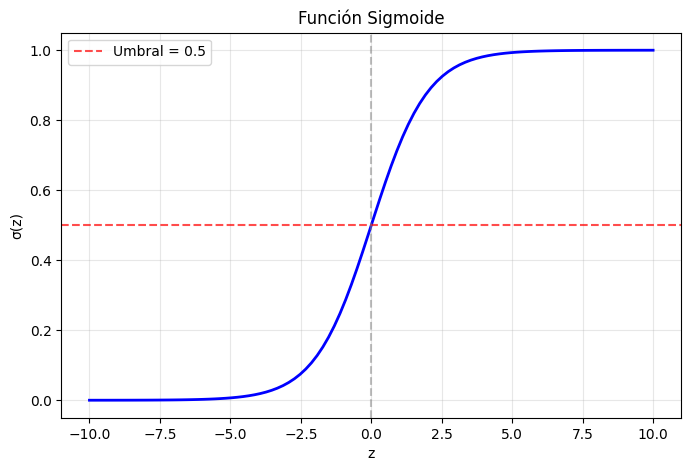

In [88]:
# Visualizar la función sigmoide
z_range = np.linspace(-10, 10, 100)
plt.figure(figsize=(8, 5))
plt.plot(z_range, sigmoid(z_range), 'b-', linewidth=2)
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Umbral = 0.5')
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.title('Función Sigmoide')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Función de Costo (Binary Cross-Entropy)

La función de costo mide qué tan mal están nuestras predicciones. Para regresión logística usamos **Binary Cross-Entropy**:

$$J(w, b) = -\frac{1}{m}\sum_{i=1}^{m}\left[y^{(i)}\log(h^{(i)}) + (1-y^{(i)})\log(1-h^{(i)})\right]$$

Donde:
- $m$ = número de ejemplos de entrenamiento
- $h^{(i)} = \sigma(w \cdot x^{(i)} + b)$ = predicción (probabilidad)
- $y^{(i)}$ = label real (0 o 1)

**Intuición:**
- Si $y=1$ y predecimos $h \approx 1$ → costo bajo ✓
- Si $y=1$ y predecimos $h \approx 0$ → costo muy alto ✗
- Si $y=0$ y predecimos $h \approx 0$ → costo bajo ✓
- Si $y=0$ y predecimos $h \approx 1$ → costo muy alto ✗

In [89]:
def compute_cost(X, y, w, b):
    m = X.shape[0]  # Número de ejemplos
    
    # Paso 1: Calcular z = X @ w + b
    z = np.dot(X, w) + b
    
    # Paso 2: Aplicar sigmoid para obtener predicciones h
    h = sigmoid(z)
    
    # Paso 3: Evitar log(0) con un pequeño epsilon
    epsilon = 1e-15
    h = np.clip(h, epsilon, 1 - epsilon)
    
    # Paso 4: Calcular el costo
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    
    return cost

# Verificar con parámetros iniciales (w=0, b=0)
n_features = X_train_norm.shape[1]
w_init = np.zeros(n_features)
b_init = 0

initial_cost = compute_cost(X_train_norm, y_train, w_init, b_init)
print(f"Costo inicial (w=0, b=0): {initial_cost:.6f}")
print(f"Costo esperado teórico con w=0, b=0: {-np.log(0.5):.6f}")

Costo inicial (w=0, b=0): 0.693147
Costo esperado teórico con w=0, b=0: 0.693147


### Cálculo de Gradientes

Los gradientes nos indican **en qué dirección** y **cuánto** debemos ajustar los parámetros para reducir el costo.

$$\frac{\partial J}{\partial w_j} = \frac{1}{m}\sum_{i=1}^{m}(h^{(i)} - y^{(i)})x_j^{(i)}$$

$$\frac{\partial J}{\partial b} = \frac{1}{m}\sum_{i=1}^{m}(h^{(i)} - y^{(i)})$$

En forma vectorizada:
- $\nabla_w J = \frac{1}{m} X^T (h - y)$
- $\frac{\partial J}{\partial b} = \frac{1}{m} \sum (h - y)$

In [90]:
def compute_gradients(X, y, w, b):
    m = X.shape[0]
    
    # Calcular predicciones
    z = np.dot(X, w) + b
    h = sigmoid(z)
    
    # Calcular error
    error = h - y
    
    # Calcular gradientes
    dw = (1/m) * np.dot(X.T, error)
    db = (1/m) * np.sum(error)
    
    return dw, db

# Verificar gradientes iniciales
dw_init, db_init = compute_gradients(X_train_norm, y_train, w_init, b_init)
print("Gradientes iniciales:")
print(f"dw = {dw_init}")
print(f"db = {db_init:.6f}")

Gradientes iniciales:
dw = [-0.1355447  -0.14098074 -0.0828104   0.21599968 -0.21803207 -0.21911117]
db = 0.055556


### Algoritmo de Gradient Descent

Gradient Descent ajusta iterativamente los parámetros en la dirección opuesta al gradiente:

$$w := w - \alpha \frac{\partial J}{\partial w}$$

$$b := b - \alpha \frac{\partial J}{\partial b}$$

Donde $\alpha$ es el **learning rate** (tasa de aprendizaje).

In [91]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iters, print_every=100):
    w = w_init.copy()
    b = b_init
    cost_history = []
    
    for i in range(num_iters):
        # Calcular gradientes
        dw, db = compute_gradients(X, y, w, b)
        
        # Actualizar parámetros
        w = w - alpha * dw
        b = b - alpha * db
        
        # Guardar costo
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
        
        # Imprimir progreso
        if i % print_every == 0:
            print(f"Iteración {i:4d}: Costo = {cost:.6f}")
    
    return w, b, cost_history

print("Función gradient_descent definida correctamente")

Función gradient_descent definida correctamente


### Entrenar el Modelo

Entrenamos el modelo con:
- Learning rate $\alpha = 0.1$
- 1000 iteraciones

In [92]:

alpha = 0.1        # Learning rate
num_iters = 1000   # Número de iteraciones

# Entrenar
print("ENTRENAMIENTO")
w, b, cost_history = gradient_descent(
    X_train_norm, y_train, 
    w_init, b_init, 
    alpha, num_iters,
    print_every=200
)
print(f"\nEntrenamiento completado!")
print(f"Costo final: {cost_history[-1]:.6f}")

ENTRENAMIENTO
Iteración    0: Costo = 0.674580
Iteración  200: Costo = 0.429777
Iteración  400: Costo = 0.426466
Iteración  600: Costo = 0.426105
Iteración  800: Costo = 0.426057

Entrenamiento completado!
Costo final: 0.426051


### Interpretación de los Pesos

Los pesos aprendidos nos indican la importancia y dirección del efecto de cada feature:
- Peso positivo: aumenta la probabilidad de enfermedad
- Peso negativo: disminuye la probabilidad de enfermedad

In [93]:
# Mostrar pesos aprendidos
print("PESOS APRENDIDOS")
print(f"{'Feature':<25} {'Peso (w)':<12} {'Interpretación'}")
for i, name in enumerate(feature_names):
    peso = w[i]
    if peso > 0:
        interp = "Aumenta riesgo"
    else:
        interp = "Disminuye riesgo"
    print(f"{name:<25} {peso:<12.4f} {interp}")
print(f"{'Bias (b)':<25} {b:<12.4f}")

PESOS APRENDIDOS
Feature                   Peso (w)     Interpretación
Age                       -0.2713      Disminuye riesgo
BP                        0.6641       Aumenta riesgo
Cholesterol               0.2563       Aumenta riesgo
Max HR                    -0.9393      Disminuye riesgo
ST depression             0.9070       Aumenta riesgo
Number of vessels fluro   1.0838       Aumenta riesgo
Bias (b)                  -0.1381     


### Predicciones y Evaluación

Implementamos funciones para:
1. Predecir clases (0 o 1) usando umbral de 0.5
2. Calcular métricas: Accuracy, Precision, Recall, F1-Score

In [94]:
def predict(X, w, b, threshold=0.5):
    z = np.dot(X, w) + b
    probabilities = sigmoid(z)
    return (probabilities >= threshold).astype(int)


def compute_metrics(y_true, y_pred):
    # Confusion matrix components
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives
    
    # Métricas
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN
    }

print("Funciones de predicción y métricas definidas")

Funciones de predicción y métricas definidas


In [95]:
 # Predicciones en train y test
y_train_pred = predict(X_train_norm, w, b)
y_test_pred = predict(X_test_norm, w, b)

# Calcular métricas
train_metrics = compute_metrics(y_train, y_train_pred)
test_metrics = compute_metrics(y_test, y_test_pred)

# Mostrar resultados
print("EVALUACIÓN DEL MODELO")
print(f"{'Métrica':<15} {'Train':<15} {'Test':<15}")
print(f"{'Accuracy':<15} {train_metrics['accuracy']:<15.4f} {test_metrics['accuracy']:<15.4f}")
print(f"{'Precision':<15} {train_metrics['precision']:<15.4f} {test_metrics['precision']:<15.4f}")
print(f"{'Recall':<15} {train_metrics['recall']:<15.4f} {test_metrics['recall']:<15.4f}")
print(f"{'F1-Score':<15} {train_metrics['f1']:<15.4f} {test_metrics['f1']:<15.4f}")

EVALUACIÓN DEL MODELO
Métrica         Train           Test           
Accuracy        0.8042          0.7778         
Precision       0.8310          0.7812         
Recall          0.7024          0.6944         
F1-Score        0.7613          0.7353         


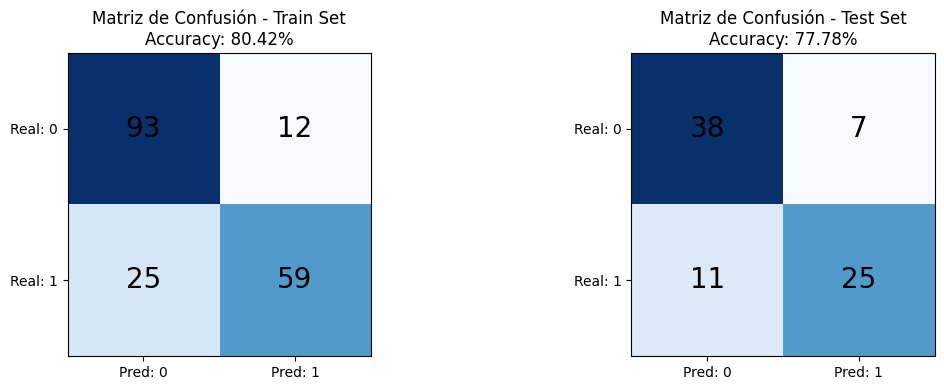

In [96]:
# Visualizar matriz de confusión para Test set
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for idx, (metrics, title, y_true, y_pred) in enumerate([
    (train_metrics, 'Train Set', y_train, y_train_pred),
    (test_metrics, 'Test Set', y_test, y_test_pred)
]):
    ax = axes[idx]
    
    # Crear matriz de confusión
    cm = np.array([[metrics['TN'], metrics['FP']], 
                   [metrics['FN'], metrics['TP']]])
    
    # Graficar
    im = ax.imshow(cm, cmap='Blues')
    
    # Añadir valores
    for i in range(2):
        for j in range(2):
            ax.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=20)
    
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Pred: 0', 'Pred: 1'])
    ax.set_yticklabels(['Real: 0', 'Real: 1'])
    ax.set_title(f'Matriz de Confusión - {title}\nAccuracy: {metrics["accuracy"]:.2%}')

plt.tight_layout()
plt.show()

---
## Visualizar Decision Boundaries

Para visualizar cómo el modelo separa las clases, entrenamos modelos usando solo 2 features a la vez y graficamos la frontera de decisión.

Pares de features a analizar:
1. Age vs Cholesterol
2. BP vs Max HR
3. ST depression vs Number of vessels fluro

In [97]:
def plot_decision_boundary(X, y, w, b, feature_names, title):
    # Crear grid de puntos
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    xx1, xx2 = np.meshgrid(
        np.linspace(x1_min, x1_max, 200),
        np.linspace(x2_min, x2_max, 200)
    )
    
    # Predecir probabilidad en cada punto del grid
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    probs = sigmoid(np.dot(grid, w) + b).reshape(xx1.shape)
    
    # Graficar
    plt.figure(figsize=(8, 6))
    
    # Regiones de decisión
    plt.contourf(xx1, xx2, probs, levels=[0, 0.5, 1], colors=['#AAAAFF', '#FFAAAA'], alpha=0.4)
    
    # Línea de decisión (donde prob = 0.5)
    plt.contour(xx1, xx2, probs, levels=[0.5], colors='black', linewidths=2)
    
    # Puntos de datos
    plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Sin enfermedad (0)', 
                edgecolors='black', s=50, alpha=0.7)
    plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='Con enfermedad (1)', 
                edgecolors='black', s=50, alpha=0.7)
    
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print("Función plot_decision_boundary definida")

Función plot_decision_boundary definida


MODELO: Age vs Cholesterol
Iteración    0: Costo = 0.690358
Accuracy en Test: 55.56%
Pesos: w1=0.536, w2=0.240, b=-0.245


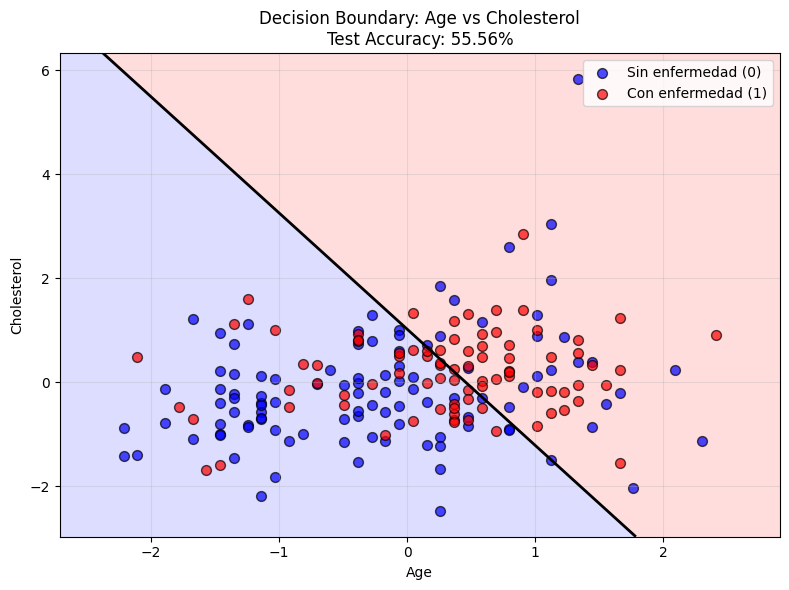

MODELO: BP vs Max HR
Iteración    0: Costo = 0.686279
Accuracy en Test: 64.20%
Pesos: w1=0.645, w2=-1.051, b=-0.236


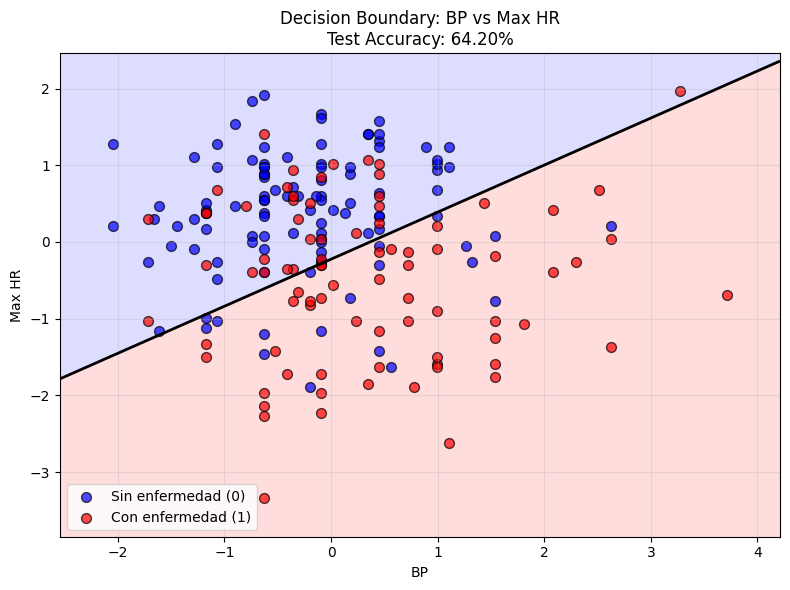

MODELO: ST depression vs Number of vessels fluro
Iteración    0: Costo = 0.683432
Accuracy en Test: 71.60%
Pesos: w1=1.065, w2=1.049, b=-0.157


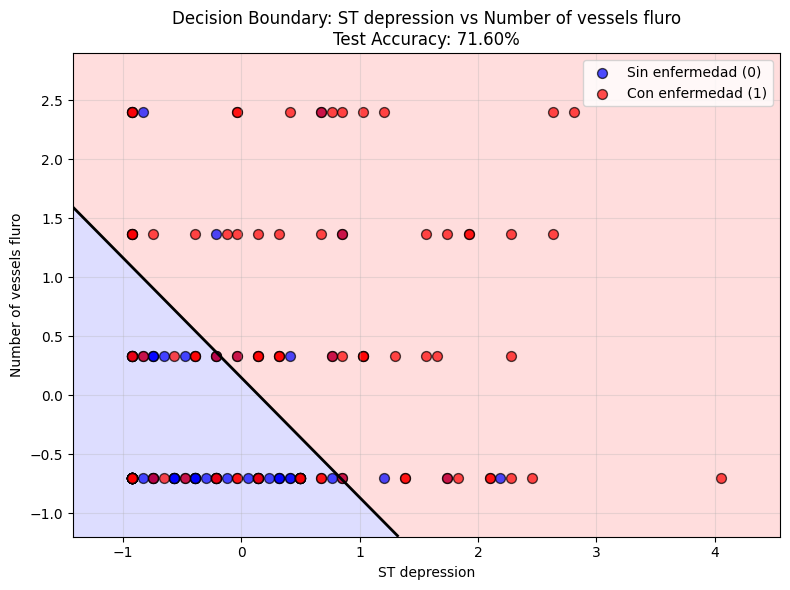

In [98]:
# Definir los pares de features a visualizar
feature_pairs = [
    ('Age', 'Cholesterol'),
    ('BP', 'Max HR'),
    ('ST depression', 'Number of vessels fluro')
]

# Para cada par, entrenar un modelo y visualizar
for feat1, feat2 in feature_pairs:
    print(f"MODELO: {feat1} vs {feat2}")
    
    # Obtener índices de las features
    idx1 = feature_names.index(feat1)
    idx2 = feature_names.index(feat2)
    
    # Extraer solo estas 2 features (ya normalizadas)
    X_pair_train = X_train_norm[:, [idx1, idx2]]
    X_pair_test = X_test_norm[:, [idx1, idx2]]
    
    # Inicializar y entrenar modelo para este par
    w_pair = np.zeros(2)
    b_pair = 0
    
    w_pair, b_pair, _ = gradient_descent(
        X_pair_train, y_train, 
        w_pair, b_pair, 
        alpha=0.1, num_iters=1000, 
        print_every=1001  # No imprimir durante entrenamiento
    )
    
    # Evaluar
    y_pred_pair = predict(X_pair_test, w_pair, b_pair)
    metrics_pair = compute_metrics(y_test, y_pred_pair)
    
    print(f"Accuracy en Test: {metrics_pair['accuracy']:.2%}")
    print(f"Pesos: w1={w_pair[0]:.3f}, w2={w_pair[1]:.3f}, b={b_pair:.3f}")
    
    # Visualizar
    plot_decision_boundary(
        X_pair_train, y_train, w_pair, b_pair,
        [feat1, feat2],
        f'Decision Boundary: {feat1} vs {feat2}\nTest Accuracy: {metrics_pair["accuracy"]:.2%}'
    )

### Análisis de Decision Boundaries

**Resultados por par de features:**

| Par de Features | Test Accuracy | Separabilidad |
|-----------------|---------------|---------------|
| Age vs Cholesterol | 55.56% | Baja - clases muy mezcladas |
| BP vs Max HR | 64.20% | Media - tendencia visible pero solapamiento |
| ST depression vs Number of vessels fluro | 71.60% | Alta - mejor separación lineal |

**Conclusiones:**
- El par **ST depression + Number of vessels fluro** logra la mejor separación, consistente con los pesos más altos del modelo completo.
- **Age y Cholesterol** por sí solos no son buenos predictores (accuracy cercano a aleatorio).
- La combinación de las 6 features (77.78% accuracy) supera a cualquier par individual, demostrando que la información se complementa.

---
## Regularización L2

La regularización penaliza pesos grandes para evitar overfitting. Agregamos el término L2 al costo:

$$J_{reg}(w, b) = J(w, b) + \frac{\lambda}{2m}\sum_{j=1}^{n}w_j^2$$

Y modificamos el gradiente:

$$\frac{\partial J_{reg}}{\partial w_j} = \frac{\partial J}{\partial w_j} + \frac{\lambda}{m}w_j$$

**Nota:** No regularizamos el bias $b$.

In [99]:
def compute_cost_regularized(X, y, w, b, lambda_):
    m = X.shape[0]
    
    # Costo base (sin regularización)
    base_cost = compute_cost(X, y, w, b)
    
    # Término de regularización
    reg_term = (lambda_ / (2 * m)) * np.sum(w ** 2)
    
    return base_cost + reg_term


def compute_gradients_regularized(X, y, w, b, lambda_):
    m = X.shape[0]
    
    # Gradientes base
    dw, db = compute_gradients(X, y, w, b)
    
    # Agregar término de regularización a dw (NO a db)
    dw = dw + (lambda_ / m) * w
    
    return dw, db


def gradient_descent_regularized(X, y, w_init, b_init, alpha, num_iters, lambda_, print_every=100):
    w = w_init.copy()
    b = b_init
    cost_history = []
    
    for i in range(num_iters):
        # Gradientes regularizados
        dw, db = compute_gradients_regularized(X, y, w, b, lambda_)
        
        # Actualizar parámetros
        w = w - alpha * dw
        b = b - alpha * db
        
        # Guardar costo regularizado
        cost = compute_cost_regularized(X, y, w, b, lambda_)
        cost_history.append(cost)
        
        if i % print_every == 0 and print_every <= num_iters:
            print(f"Iteración {i:4d}: Costo = {cost:.6f}")
    
    return w, b, cost_history

print("Funciones de regularización definidas")

Funciones de regularización definidas


### Experimentos con diferentes valores de λ

Probamos varios valores de regularización para encontrar el óptimo.

In [100]:
# Valores de lambda a probar
lambdas = [0, 0.001, 0.01, 0.1, 1, 10]

# Almacenar resultados
results = []

print("Probando diferentes valores de lambda...\n")

for lam in lambdas:
    # Entrenar el modelo
    w_reg, b_reg, cost_hist = gradient_descent_regularized(
        X_train_norm, y_train,
        np.zeros(n_features), 0,
        alpha=0.1, num_iters=1000, lambda_=lam,
        print_every=10000  
    )
    
    # Evaluar en test
    y_pred_test = predict(X_test_norm, w_reg, b_reg)
    metrics = compute_metrics(y_test, y_pred_test)
    
    # Calcular norma de pesos
    w_norm = np.linalg.norm(w_reg)
    
    # Guardar resultados
    results.append({
        'lambda': lam,
        'accuracy': metrics['accuracy'],
        'precision': metrics['precision'],
        'recall': metrics['recall'],
        'f1': metrics['f1'],
        'w_norm': w_norm,
        'w': w_reg.copy(),
        'b': b_reg
    })
    
    print(f"λ={lam}: Acc={metrics['accuracy']:.2%}, F1={metrics['f1']:.2%}, norma w={w_norm:.3f}")

Probando diferentes valores de lambda...

λ=0: Acc=77.78%, F1=73.53%, norma w=1.860
λ=0.001: Acc=77.78%, F1=73.53%, norma w=1.860
λ=0.01: Acc=77.78%, F1=73.53%, norma w=1.858
λ=0.1: Acc=77.78%, F1=73.53%, norma w=1.844
λ=1: Acc=76.54%, F1=71.64%, norma w=1.720
λ=10: Acc=72.84%, F1=65.62%, norma w=1.171


In [101]:
# Crear tabla de resultados
print("\nTABLA COMPARATIVA DE REGULARIZACIÓN")
print(f"{'λ':<8} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12} {'||w||':<10}")

best_f1 = 0
best_lambda = 0

for r in results:
    print(f"{r['lambda']:<8} {r['accuracy']:<12.4f} {r['precision']:<12.4f} {r['recall']:<12.4f} {r['f1']:<12.4f} {r['w_norm']:<10.4f}")
    if r['f1'] > best_f1:
        best_f1 = r['f1']
        best_lambda = r['lambda']

print(f"\n✓ Mejor λ según F1-Score: {best_lambda} (F1 = {best_f1:.4f})")


TABLA COMPARATIVA DE REGULARIZACIÓN
λ        Accuracy     Precision    Recall       F1-Score     ||w||     
0        0.7778       0.7812       0.6944       0.7353       1.8601    
0.001    0.7778       0.7812       0.6944       0.7353       1.8599    
0.01     0.7778       0.7812       0.6944       0.7353       1.8585    
0.1      0.7778       0.7812       0.6944       0.7353       1.8442    
1        0.7654       0.7742       0.6667       0.7164       1.7204    
10       0.7284       0.7500       0.5833       0.6562       1.1706    

✓ Mejor λ según F1-Score: 0 (F1 = 0.7353)


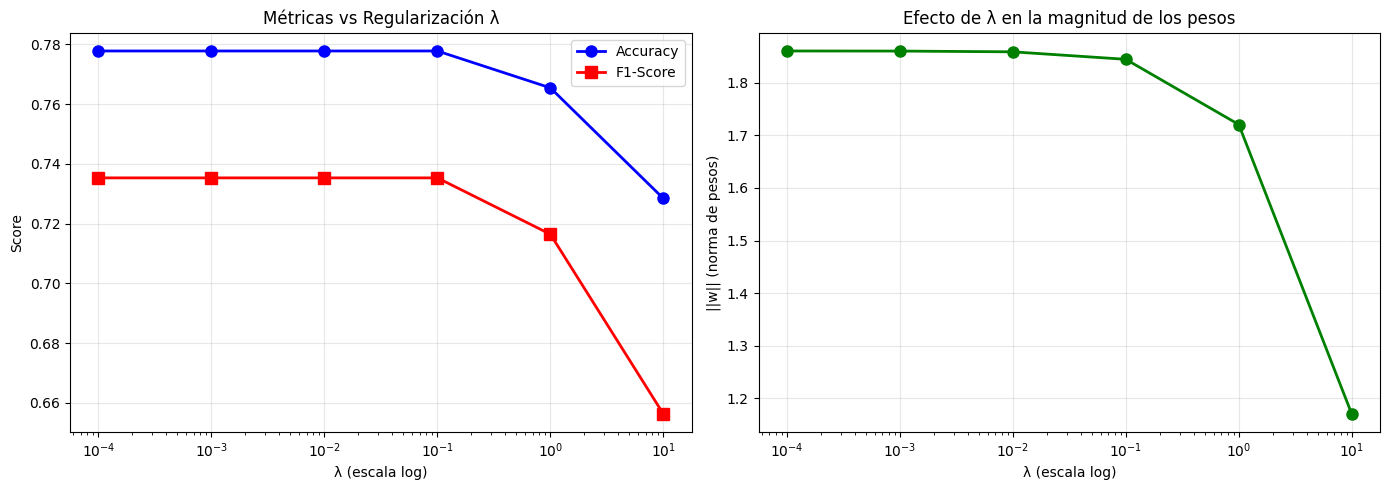

In [102]:
# Graficar efecto de lambda en métricas y norma de pesos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

lambdas_plot = [r['lambda'] for r in results]
accuracies = [r['accuracy'] for r in results]
f1_scores = [r['f1'] for r in results]
w_norms = [r['w_norm'] for r in results]

# Gráfica 1: Métricas vs Lambda
ax1 = axes[0]
ax1.semilogx([l if l > 0 else 0.0001 for l in lambdas_plot], accuracies, 'bo-', label='Accuracy', linewidth=2, markersize=8)
ax1.semilogx([l if l > 0 else 0.0001 for l in lambdas_plot], f1_scores, 'rs-', label='F1-Score', linewidth=2, markersize=8)
ax1.set_xlabel('λ (escala log)')
ax1.set_ylabel('Score')
ax1.set_title('Métricas vs Regularización λ')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfica 2: Norma de pesos vs Lambda
ax2 = axes[1]
ax2.semilogx([l if l > 0 else 0.0001 for l in lambdas_plot], w_norms, 'go-', linewidth=2, markersize=8)
ax2.set_xlabel('λ (escala log)')
ax2.set_ylabel('||w|| (norma de pesos)')
ax2.set_title('Efecto de λ en la magnitud de los pesos')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Análisis de Resultados de Regularización

**Hallazgos:**
- El modelo sin regularización (λ=0) obtiene el mejor rendimiento
- Valores pequeños de λ (0.001 a 0.1) no afectan significativamente
- Valores grandes (λ≥1) causan **underfitting**: los pesos se reducen demasiado y el modelo pierde capacidad predictiva

**¿Por qué λ=0 es óptimo aquí?**
1. El dataset es pequeño (270 muestras) con pocas features (6)
2. No hay overfitting significativo (diferencia train-test ~3%)
3. La regularización es más útil con modelos de alta dimensionalidad

**Recomendación:** Para este problema, usar λ=0 o λ=0.01 como valor conservador.

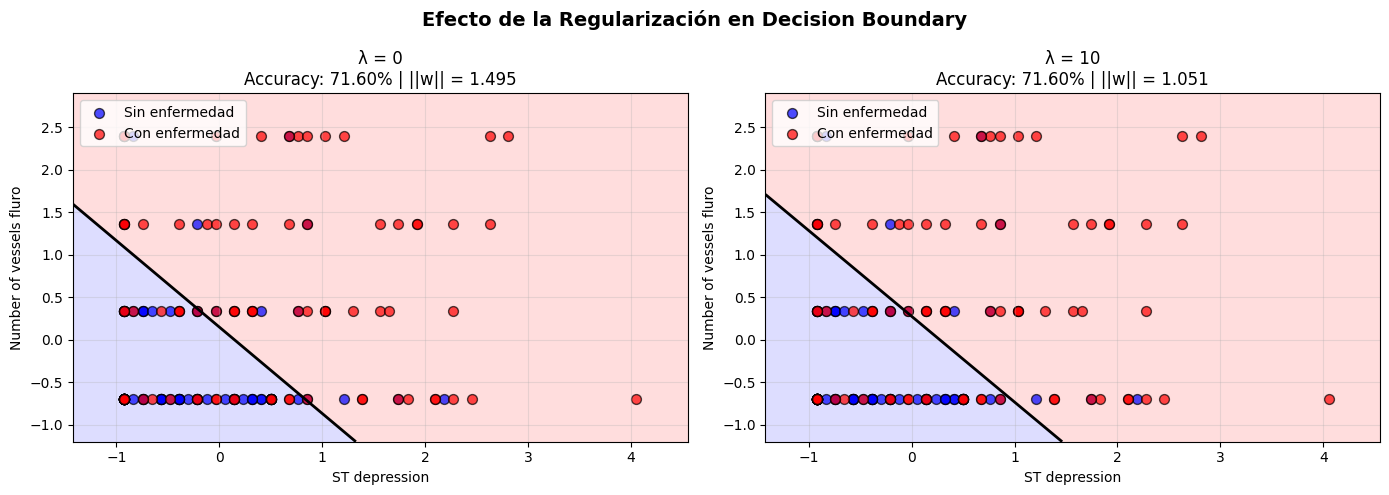

In [103]:
# Comparar decision boundaries con y sin regularización
# Usamos el mejor par: ST depression vs Number of vessels fluro

feat1, feat2 = 'ST depression', 'Number of vessels fluro'
idx1 = feature_names.index(feat1)
idx2 = feature_names.index(feat2)

X_pair_train = X_train_norm[:, [idx1, idx2]]
X_pair_test = X_test_norm[:, [idx1, idx2]]

# Entrenar con λ=0 y λ=10
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for ax, lam in zip(axes, [0, 10]):
    # Entrenar
    w_pair, b_pair, _ = gradient_descent_regularized(
        X_pair_train, y_train,
        np.zeros(2), 0,
        alpha=0.1, num_iters=1000, lambda_=lam,
        print_every=10000
    )
    
    # Evaluar
    y_pred = predict(X_pair_test, w_pair, b_pair)
    acc = compute_metrics(y_test, y_pred)['accuracy']
    
    # Crear grid
    x1_min, x1_max = X_pair_train[:, 0].min() - 0.5, X_pair_train[:, 0].max() + 0.5
    x2_min, x2_max = X_pair_train[:, 1].min() - 0.5, X_pair_train[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                           np.linspace(x2_min, x2_max, 200))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    probs = sigmoid(np.dot(grid, w_pair) + b_pair).reshape(xx1.shape)
    
    # Graficar
    ax.contourf(xx1, xx2, probs, levels=[0, 0.5, 1], colors=['#AAAAFF', '#FFAAAA'], alpha=0.4)
    ax.contour(xx1, xx2, probs, levels=[0.5], colors='black', linewidths=2)
    ax.scatter(X_pair_train[y_train==0, 0], X_pair_train[y_train==0, 1], 
               c='blue', label='Sin enfermedad', edgecolors='black', s=50, alpha=0.7)
    ax.scatter(X_pair_train[y_train==1, 0], X_pair_train[y_train==1, 1], 
               c='red', label='Con enfermedad', edgecolors='black', s=50, alpha=0.7)
    
    ax.set_xlabel(feat1)
    ax.set_ylabel(feat2)
    ax.set_title(f'λ = {lam}\nAccuracy: {acc:.2%} | ||w|| = {np.linalg.norm(w_pair):.3f}')
    ax.legend(loc='upper left')
    ax.grid(True, alpha=0.3)

plt.suptitle('Efecto de la Regularización en Decision Boundary', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
## Conclusiones Finales

### Resumen del Modelo

| Aspecto | Resultado |
|---------|-----------|
| Dataset | 270 pacientes, 6 features clínicas |
| Mejor modelo | Regresión logística sin regularización (λ=0) |
| Accuracy (Test) | 77.78% |
| F1-Score (Test) | 73.53% |
| Precision | 78.12% |
| Recall | 69.44% |

### Features más predictivas

1. **Number of vessels fluro** (w=1.08): Mayor predictor de riesgo
2. **ST depression** (w=0.91): Indicador de isquemia
3. **Max HR** (w=-0.94): Factor protector (mayor capacidad = menor riesgo)

### Hallazgos clave

1. **Regularización:** No mejora el rendimiento en este caso debido al tamaño pequeño del dataset y pocas features. Valores altos de λ causan underfitting.

2. **Separabilidad:** El par ST depression + Number of vessels fluro logra 71.6% accuracy con solo 2 features, confirmando su poder predictivo.

3. **Generalización:** El modelo generaliza bien (diferencia train-test ~3%), sin overfitting significativo.

### Aplicación clínica

El modelo puede servir como herramienta de screening inicial para identificar pacientes de alto riesgo que requieren evaluación más detallada. Un accuracy del 78% es útil para priorización, aunque no reemplaza el diagnóstico médico profesional.

---
## Preparación para Deployment

### Exportar el modelo entrenado

In [104]:
# Guardar parámetros del mejor modelo
model_params = {
    'weights': w,
    'bias': b,
    'feature_names': feature_names,
    'feature_mean': feat_mean,
    'feature_std': feat_std,
    'lambda': 0,
    'metrics': {
        'accuracy': test_metrics['accuracy'],
        'precision': test_metrics['precision'],
        'recall': test_metrics['recall'],
        'f1': test_metrics['f1']
    }
}

# Guardar como archivo .npy
np.save('model_params.npy', model_params)
print("Modelo guardado en 'model_params.npy'")

# Verificar que se puede cargar
loaded = np.load('model_params.npy', allow_pickle=True).item()
print(f"\nParámetros guardados:")
print(f"  - Weights shape: {loaded['weights'].shape}")
print(f"  - Bias: {loaded['bias']:.4f}")
print(f"  - Features: {loaded['feature_names']}")

Modelo guardado en 'model_params.npy'

Parámetros guardados:
  - Weights shape: (6,)
  - Bias: -0.1381
  - Features: ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']


In [105]:
def predict_heart_disease(patient_data, model_params):
    features = model_params['feature_names']
    x = np.array([patient_data[f] for f in features])
    
    # Normalizar usando estadísticas del entrenamiento
    x_norm = (x - model_params['feature_mean']) / model_params['feature_std']
    
    # Calcular probabilidad
    z = np.dot(x_norm, model_params['weights']) + model_params['bias']
    probability = sigmoid(z)
    
    # Clasificar
    prediction = 'Alto riesgo' if probability >= 0.5 else 'Bajo riesgo'
    
    return {
        'probability': float(probability),
        'prediction': prediction,
        'risk_level': 'HIGH' if probability >= 0.5 else 'LOW'
    }

# Ejemplo de uso
sample_patient = {
    'Age': 60,
    'BP': 140,
    'Cholesterol': 300,
    'Max HR': 140,
    'ST depression': 2.5,
    'Number of vessels fluro': 2
}

result = predict_heart_disease(sample_patient, loaded)
print("EJEMPLO DE PREDICCIÓN")
print(f"Paciente: {sample_patient}")
print(f"\nResultado:")
print(f"  Probabilidad de enfermedad: {result['probability']:.2%}")
print(f"  Clasificación: {result['prediction']}")

EJEMPLO DE PREDICCIÓN
Paciente: {'Age': 60, 'BP': 140, 'Cholesterol': 300, 'Max HR': 140, 'ST depression': 2.5, 'Number of vessels fluro': 2}

Resultado:
  Probabilidad de enfermedad: 96.24%
  Clasificación: Alto riesgo
